# Exercise 1.1
Load an image and compute the full SVD. 
- A.  Choose a rank $r<m$ and confirm that the matirx $U^*U$ is the $r\times r$ identity matrix
- B. Confirm that $UU^*$ is *not* the identity matrix
- C. Compute the norm of the error between $UU^*$ and the $n\times n$ identity matrix as the rank $r$ varies from $1$ to $n$ and plot the error.


### Load an image and compute the full SVD

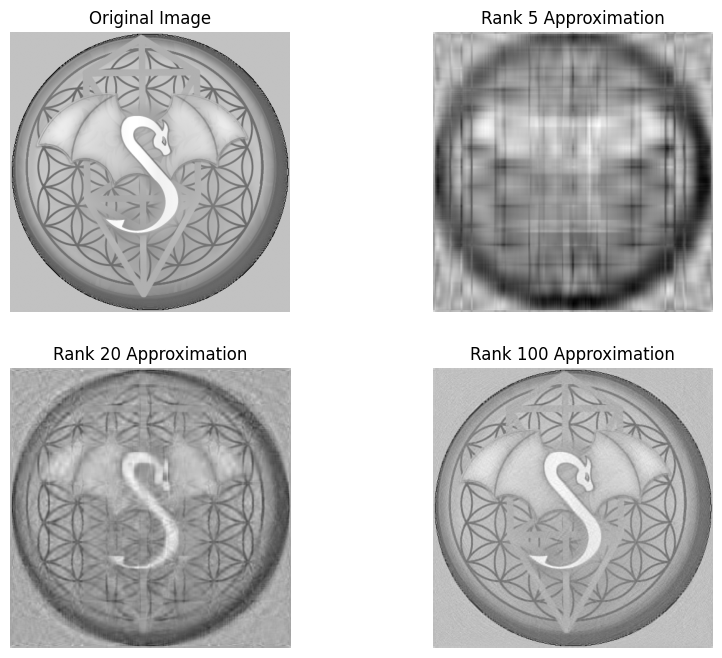

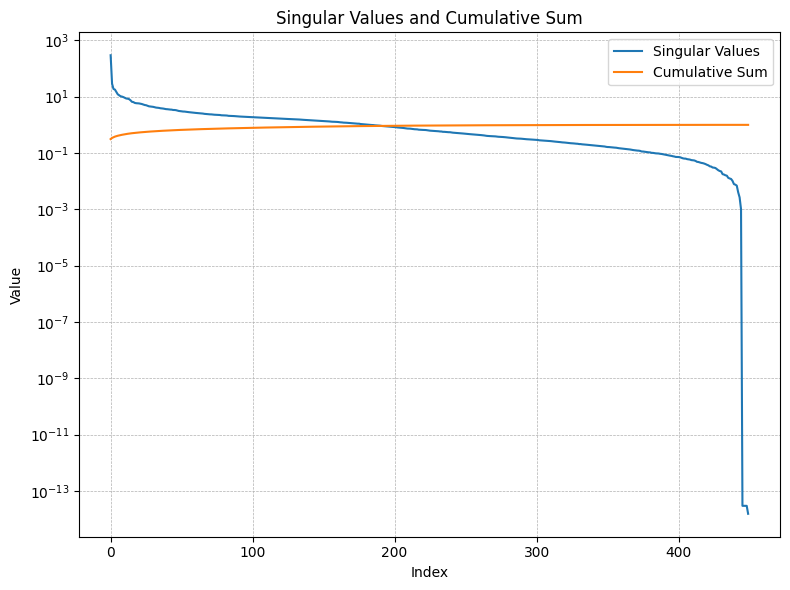

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Load the image
A = imread('/workspaces/scribing/images/logo.png')
X = np.mean(A, -1)  # Convert to grayscale

# Take the SVD
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

# Create a 2x2 grid for plots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot the original image
axes[0, 0].imshow(X, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Plot approximations for various ranks
ranks = [5, 20, 100]
for i, r in enumerate(ranks):
    row, col = divmod(i + 1, 2)  # Determine subplot position
    Xapprox = U[:, :r] @ S[:r, :r] @ VT[:r, :]
    axes[row, col].imshow(Xapprox, cmap='gray')
    axes[row, col].set_title(f"Rank {r} Approximation")
    axes[row, col].axis('off')

# Leave the last subplot empty
axes[1, 1].axis('off')

# Plot singular values and cumulative sum
fig, ax = plt.subplots(figsize=(8, 6))
singular_values = np.diag(S)
cumulative_sum = np.cumsum(singular_values) / np.sum(singular_values)

ax.semilogy(singular_values, label="Singular Values")
ax.plot(cumulative_sum, label="Cumulative Sum")
ax.set_title("Singular Values and Cumulative Sum")
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.grid(True, which="both", linestyle="--", linewidth=0.5)
ax.legend()
plt.tight_layout()

plt.show()